## Общая информация

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру  компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы  (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность  игры закономерности. Это позволит сделать ставку на потенциально популярный  продукт и спланировать рекламные кампании. 
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы  планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.  
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же  2027-й — по данным 2026 года. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating  Board) — это ассоциация, определяющая возрастной рейтинг компьютерных  
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную  категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для  подростков». 


Name — название игры <br>
Platform — платформа <br>
Year_of_Release — год выпуска <br>
Genre — жанр игры <br>
NA_sales — продажи в Северной Америке (миллионы проданных копий) <br>
EU_sales — продажи в Европе (миллионы проданных копий) <br>
JP_sales — продажи в Японии (миллионы проданных копий) <br>
Other_sales — продажи в других странах (миллионы проданных копий) <br>
Critic_Score — оценка критиков (максимум 100) <br>
User_Score — оценка пользователей (максимум 10) <br>
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating  Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает  им подходящую возрастную категорию. 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

Данные подгружены. <br>
Следует убрать заглавные буквы как в названии столбцах, так и в самих данных. 


In [4]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Взял функцию с прошлого проекта, чуть дополнил её необходимым. 

In [5]:
def check_dataset(data, 
                  lst_to_int = [], 
                  lst_to_float32 = [], 
                  column_to_datetime = [], 
                  format_ = '%Y-%m-%d',
                  column_drop = [],
                  round_column = [],
                  lower_column = []):
    check_count = 0
    type_dict = {}
    for elem in lower_column:
        data[elem] = data[elem].str.lower()
    for elem in lst_to_int:
        type_dict[elem] = 'int'
        
    for elem in lst_to_float32:
        type_dict[elem] = 'float32'
        
    for col in column_to_datetime:
        data[col] = pd.to_datetime(data[col][~data[col].isna()], format = format_)
    if len(type_dict) != 0:
        for i, j in type_dict.items():
            data[i] = data[i][~data[i].isna()].astype({i:j})
        check_count += 1
        
    if data.duplicated().value_counts()[False] != len(data):
        print(f'Явных дубликатов {data.duplicated().value_counts()[True]}')
    else:
        print('Явных дубликатов - нет')
        check_count += 1
    
    for col in column_drop:
        data = data.drop(col, axis = 1)
    count = 0
    for col in data.columns:
        val = data[col].isna().value_counts()
        if val[False] != len(data):
            print(f'Количество пропущенных значений в стоблце {col} - {round(val[True] / len(data) * 100, 2)} %')
        else:
            count += 1
        if count == len(data.columns):
            print('Пропущенных значений - нет')
            check_count += 1
    for col in round_column:
        data[col] = data[col].apply(math.ceil)
    print(data.info())
    print(data.head())
    if check_count == 3:
        print('Успешная проверка и преобразование типов')
    return data

In [6]:
dataset = check_dataset(data, 
                        lst_to_int = ['year_of_release'], 
                        lower_column = ['name', 'platform', 'genre'],
                        lst_to_float32 = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])

Явных дубликатов - нет
Количество пропущенных значений в стоблце name - 0.01 %
Количество пропущенных значений в стоблце year_of_release - 1.61 %
Количество пропущенных значений в стоблце genre - 0.01 %
Количество пропущенных значений в стоблце critic_score - 51.32 %
Количество пропущенных значений в стоблце user_score - 40.09 %
Количество пропущенных значений в стоблце rating - 40.48 %
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float32
 5   eu_sales         16715 non-null  float32
 6   jp_sales         16715 non-null  float32
 7   other_sales      16715 non-null  float32
 8   critic_score     8137 non-null   flo

Хорошо, что нет явных и неявных дубликатов. Но вот пропуски, рейтинг, пользовательская оценка, оценка критиков - более 40 % !

In [7]:
dataset[dataset['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Такие строки очень неинформативны, лучше и вовсе удалить из анализа. 

In [8]:
dataset = dataset.dropna(subset = ['name'])

В самом названии содержится год, предположим, что это год релиза. 

In [9]:
dataset[dataset['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
dataset['year_of_release'][dataset['year_of_release'].isna()] = (dataset[dataset['year_of_release']
                                                                        .isna()]['name']
                                                                        .apply(lambda x: int(re.findall(r'\d\d\d\d', x)[0]) 
                                                                               if (len(re.findall(r'\d\d\d\d', x)) != 0) 
                                                                               else None))

In [11]:
dataset['year_of_release'].isna().value_counts()

False    16461
True       252
Name: year_of_release, dtype: int64

Всего 17 строк, но зато точно!

В рейтинге есть значение tbd, гугл рассказал, что: <br>
TBD — сокращение от To Be Determined. Служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.
Поэтому заменим на пропуск данное значение

In [12]:
dataset.loc[dataset['user_score'] == 'tbd', 'user_score'] = np.nan

Посчитаем суммарные продажи во всех регионах:

In [13]:
dataset['sales'] = dataset['na_sales'] + dataset['eu_sales'] + dataset['jp_sales'] + dataset['other_sales']

In [14]:
dataset.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,wii sports,wii,2006.0,sports,41.360001,28.959999,3.77,8.45,76.0,8,E,82.539993
1,super mario bros.,nes,1985.0,platform,29.080000,3.580000,6.81,0.77,NaN,NaN,NaN,40.240002
2,mario kart wii,wii,2008.0,racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,wii sports resort,wii,2009.0,sports,15.610000,10.930000,3.28,2.95,80.0,8,E,32.770000
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.270000,8.890000,10.22,1.00,NaN,NaN,NaN,31.380001


In [15]:
dataset['rating'].isna().value_counts(normalize = True)

False    0.595285
True     0.404715
Name: rating, dtype: float64

In [16]:

rating_dict = (dataset.groupby(['platform', 'genre','year_of_release', 'rating'])['rating']
                      .count()
                      .sort_values()
)
rating_dict = rating_dict[rating_dict >= 3]
rating_dict = rating_dict.index.to_frame().set_index(['platform','genre' ,'year_of_release'])
rating_dict.head(10)

,,,rating
platform,genre,year_of_release,
ps2,simulation,2006.0,T
ps3,action,2015.0,E10+
wii,racing,2008.0,T
xone,action,2015.0,E10+
pc,strategy,2008.0,E10+
wii,role-playing,2008.0,T
pc,strategy,2008.0,E
ps2,simulation,2007.0,E
psp,racing,2007.0,E


In [17]:
for i, k in enumerate(rating_dict.index):
    dataset.loc[(dataset['platform'] == k[0]) &
                (dataset['genre'] == k[1]) &
                (dataset['year_of_release'] == k[2]), 'rating'] = rating_dict.iloc[i,0]

In [18]:
dataset['rating'].isna().value_counts(normalize = True)

False    0.801951
True     0.198049
Name: rating, dtype: float64

In [19]:
critic = dataset.groupby(['platform', 'genre', 'year_of_release'])['critic_score'].agg(['median', 'count']).sort_values(by = 'count').dropna().query('count > 2').drop(columns = ['count'])

In [20]:
dataset['critic_score'].isna().value_counts(normalize = True)

True     0.513133
False    0.486867
Name: critic_score, dtype: float64

In [21]:
for i, k in enumerate(critic.index):
    dataset.loc[(dataset['platform'] == k[0]) &
                (dataset['genre'] == k[1]) &
                (dataset['year_of_release'] == k[2]), 'critic_score'] = critic.iloc[i,0]

In [22]:
dataset['critic_score'].isna().value_counts(normalize = True)

False    0.782325
True     0.217675
Name: critic_score, dtype: float64

In [23]:
dataset['user_score'] = dataset['user_score'].astype('float')

In [24]:
dataset['user_score'].isna().value_counts(normalize = True)

True     0.545863
False    0.454137
Name: user_score, dtype: float64

In [25]:
user_score = dataset.groupby(['platform', 'genre', 'year_of_release'])['user_score'].agg(['median', 'count']).sort_values(by = 'count').dropna().query('count > 2').drop(columns = ['count'])

In [26]:
for i, k in enumerate(user_score.index):
    dataset.loc[(dataset['platform'] == k[0]) &
                (dataset['genre'] == k[1]) &
                (dataset['year_of_release'] == k[2]), 'user_score'] = user_score.iloc[i,0]

In [27]:
dataset['user_score'].isna().value_counts(normalize = True)

False    0.777897
True     0.222103
Name: user_score, dtype: float64

## Вывод

- Произведена стандартная проверка датасета на пропуски, дубликаты явные и неявные. 
- Названия столбцов приведены к нижнему регистру.
- Удалены строки с очень неинформативными данными ( 2 строки) 
- Где было возможно, дополнен год релиза, если он был указан в наименовании игры. 
- Введен новый столбец с совокупными продажами по миру. 
- Отработано значение tbd - это пропуски и неясности
- Отработаны значения пропусков в столбцах рейтинга, оценке критиков и оценкой пользователей, но в каждом столбце оставленны примерно 22% пропусков. 
- **Более от 40 до 51 % пропущенных значений в рейтинге, оценки критиков, пользовательской оценке.**

## Исследовательский анализ данных 

### Сколько игр выпускалось в разные годы

<AxesSubplot:xlabel='year_of_release'>

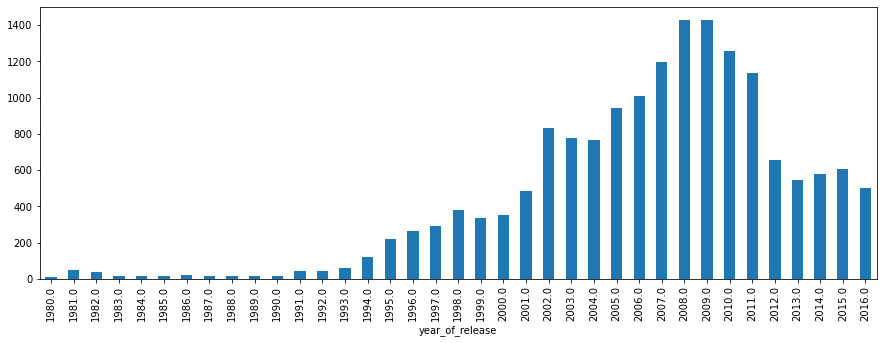

In [28]:
dataset.groupby('year_of_release')['name'].count().plot(kind = 'bar', figsize = (15,5))

Период лучше уточнить по процентности данных по годам, сделаем это! 

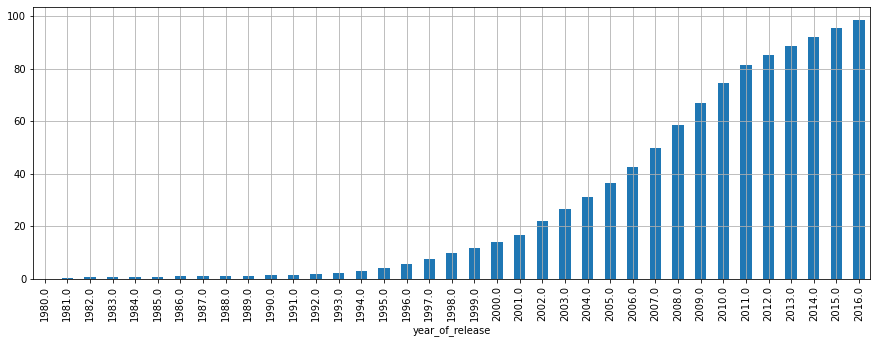

In [29]:
cum = dataset.groupby('year_of_release')['name'].agg(['count', 'sum'])
cum['sum'] = np.cumsum(dataset.groupby('year_of_release')['name'].count().values)
cum['percent'] = round(cum['sum'] / len(dataset) * 100, 1).plot(y = 'percent', kind = 'bar', figsize = (15,5), grid = True)

Как видим актуальный период лучше взять с 2001 года по 2016. Данные до 2001 года составляет до 20 % всех данных. 
Принимаем актуальный период с 2001 по 2016 год. 

### Как менялись продажи по платформам? Платформы с  наибольшими суммарными продажами?  За какой характерный срок появляются новые и исчезают старые платформы?

Для этого мы уберем пропущенные значения по годам, сделаем сводную таблицу по сумме продаж в годы релиза и по платформам.
Считаю важным отсортировать значения по убывания, от самой прибыльной платформы. 
И с помощью heatmap мы визуализируем три признака, как в течение времени разные платформы продавались. 

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

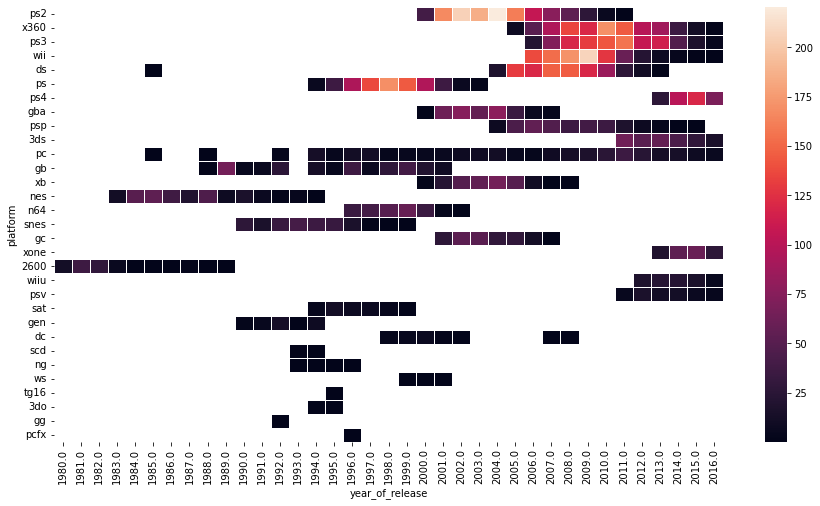

In [30]:
tmp = dataset[~dataset["year_of_release"].isna()] 
svod = tmp.pivot_table(index  = "platform", columns = "year_of_release",  values = "sales", aggfunc = 'sum')
svod['main'] = tmp.groupby('platform')['sales'].sum()
svod = svod.sort_values(by = 'main', ascending = False).drop(columns = 'main')
plt.figure(figsize = (15,8)) 
sns.heatmap(svod, linewidth = 1)

Карта отсортирована от самых прибыльных платформ по убыванию. <br>
Сделаем ещё один информирующий график. 

<AxesSubplot:xlabel='platform'>

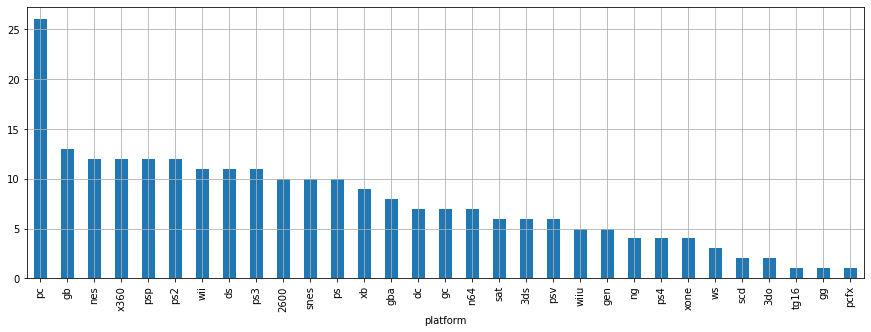

In [31]:
(
tmp.pivot_table(index  = "year_of_release", columns = "platform",  values = "sales", aggfunc = 'sum')
   .count()
   .sort_values(ascending = False)
   .plot(kind = 'bar', figsize = (15,5), grid = True)
)

Из диаграммы следует, что жизнь популярных платформ, примерно лет 11 с погрешностью 1 год. <br>
Отдельно выделяется PC - у неё самая большая живучесть, объяснется тем, что компьютеры у большинства людей, и они предназначены не только для работ, а также для игр. 
Интересно посмотреть цепочку из смены платформ PS:

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

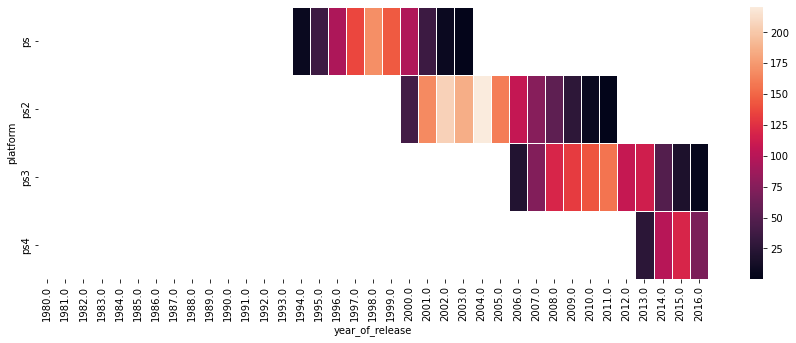

In [32]:
plt.figure(figsize = (15,5))
sns.heatmap(
tmp.pivot_table(index  = "platform", columns = "year_of_release",  values = "sales", aggfunc = 'sum')
   .query('platform in ["ps", "ps2", "ps3", "ps4"]')
   ,linewidth = 1
)

Заметно, что идёт затухание уже и платформы PS4.

Аналогично, посмотрим и для Xbox серии платформ:

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

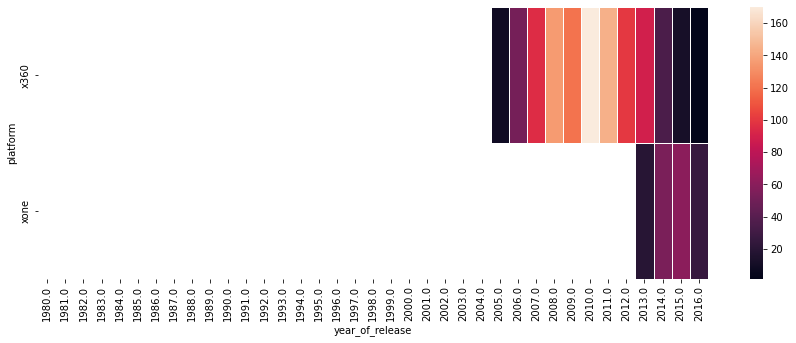

In [33]:
plt.figure(figsize = (15,5))
sns.heatmap(
tmp.pivot_table(index  = "platform", columns = "year_of_release",  values = "sales", aggfunc = 'sum')
   .query('platform in ["x360", "xone"]')
   ,linewidth = 1
)

Предварительно скажем, что платформы Xbox One и PS4 пока будут существовать, не учитывая то, что они пошли на спад. 

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Прибыльная платформа, она должна существовать сегодня и собирать большие суммы продаж, для этого отфильтруем данные. 

In [34]:
lst_plat = (dataset[(dataset['year_of_release'] == 2016) &
            (dataset['year_of_release'] >= 2000)].groupby('platform')['sales']
                                                      .sum()
                                                      .sort_values(ascending = False)
                                                      .head()
                                                      .index
)
lst_plat

Index(['ps4', 'xone', '3ds', 'pc', 'wiiu'], dtype='object', name='platform')

<AxesSubplot:xlabel='year_of_release'>

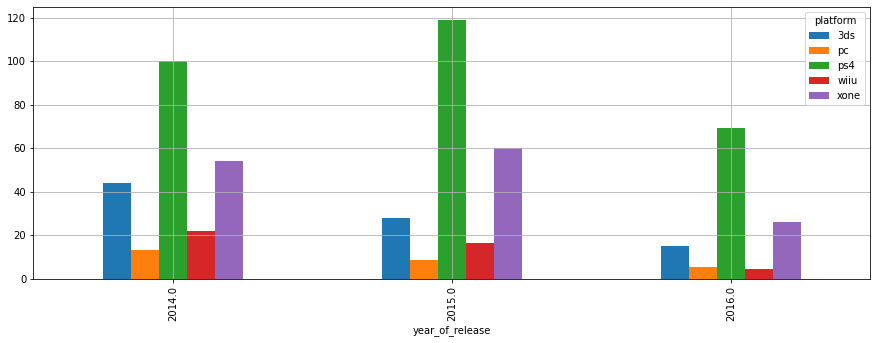

In [35]:
(
dataset.query('platform in @lst_plat')[(~dataset["year_of_release"].isna()) & (dataset['year_of_release'] >= 2014)]
.pivot_table(index  = "year_of_release", columns = "platform",  values = "sales", aggfunc = 'sum')
.plot(kind = 'bar', figsize = (15,5), grid = True, linewidth = 2)
)

Как мы видим, все платформы, что мы имеем идут на убывание, тепловая карта выше подтверждает, что это идёт по всем платформам.
Поэтому **самая выгодная платформа пока считается PS4**, а следующая за ней XOne с продажами в три раза меньше.

### Постройте график по глобальным продажам игр в разбивке по  платформам

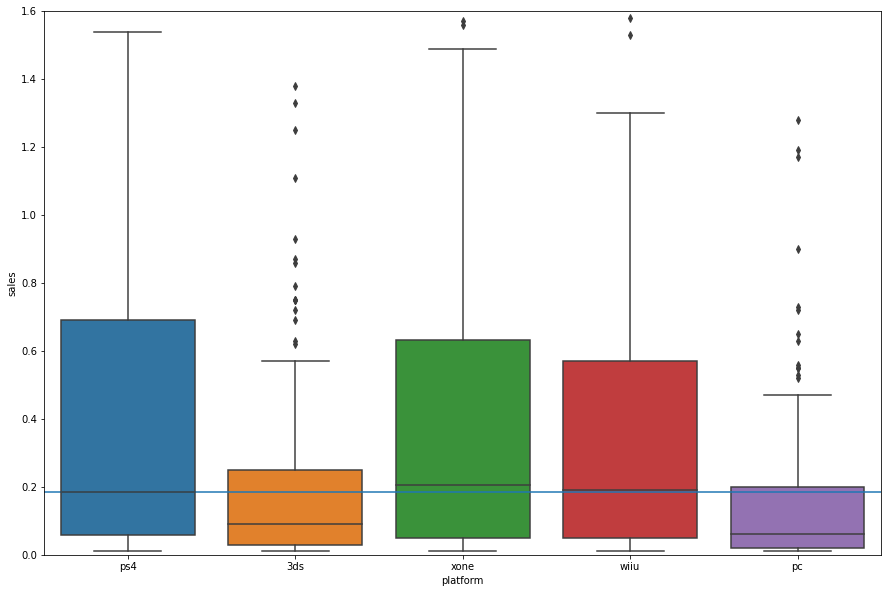

In [36]:
plt.figure(figsize = (15,10))
sns.boxplot(data = dataset.query('platform in @lst_plat')[(~dataset["year_of_release"].isna()) 
                                                          & (dataset['year_of_release'] >= 2014)], 
            x = 'platform', y = 'sales')
plt.ylim(0, 1.6)
plt.axhline(dataset.query('platform in @lst_plat')[(~dataset["year_of_release"].isna()) 
                                                & (dataset['year_of_release'] >= 2014)
                                                & (dataset['platform'] == 'ps4')]['sales'].median())

Очень много выбросов в большую сторону, скорее всего это те самые "хайповые" игры. 

### Как влияют на продажи внутри одной популярной платформы  отзывы пользователей и критиков?

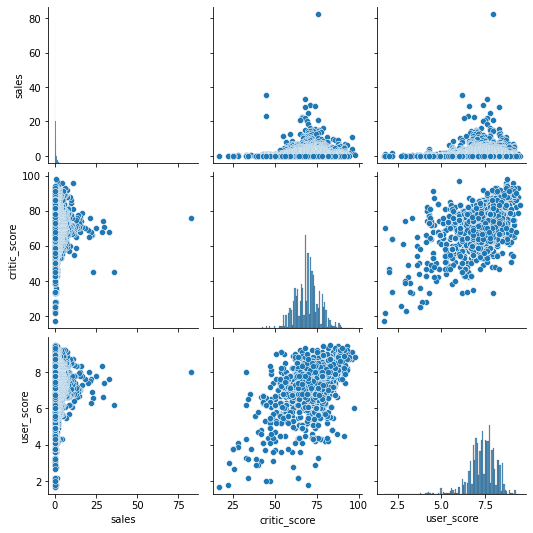

In [37]:
dataset_crit = dataset.loc[(~dataset['critic_score'].isna()) & (~dataset['user_score'].isna()), ['sales', 'critic_score','user_score']]
dataset_crit = dataset_crit.astype({'user_score':'float32'})
sns.pairplot(dataset_crit)

In [38]:
dataset_crit.corr()

,sales,critic_score,user_score
sales,1.000000,0.057313,0.018821
critic_score,0.057313,1.000000,0.391454
user_score,0.018821,0.391454,1.000000


**Продажи слабо и положительно коррелируют с оценкой критиков**, и почти не имеют взаимосвязи с пользовательской оценкой. К критикам прислушиваются больше, чем к пользовательским оценкам. 

### Соотнесите выводы с продажами игр на других платформах.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о  самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими  продажами?

<AxesSubplot:xlabel='genre'>

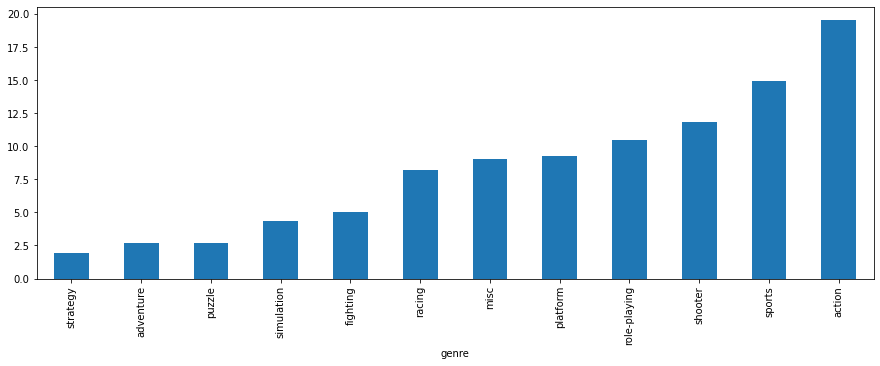

In [39]:
(dataset.groupby('genre')['sales'].sum() / dataset['sales'].sum() * 100).sort_values().plot(kind = 'bar', figsize = (15,5))

<AxesSubplot:xlabel='genre'>

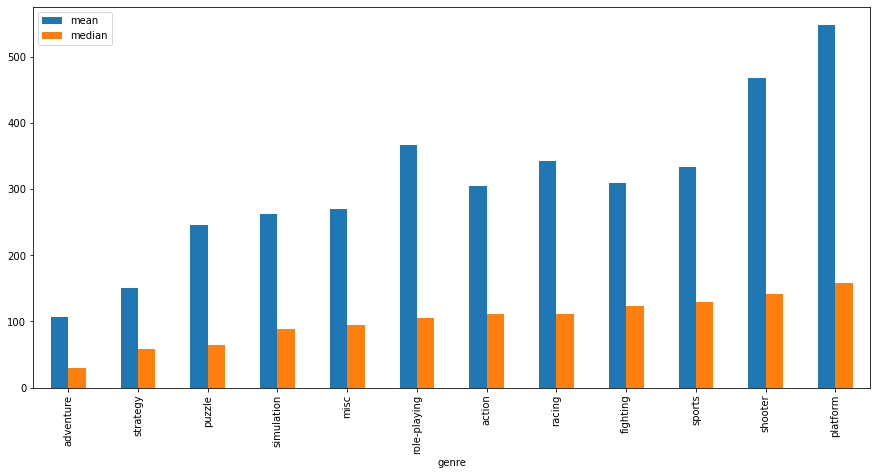

In [40]:
(dataset.groupby('genre')['sales'].agg(['mean', 'median']) / dataset['sales'].median() * 100).sort_values(by='median').plot(kind = 'bar', figsize = (15, 7))

**Самый прибыльный жанр - action**, а самые низкие продажи по жанру - стратегия. 

### Вывод

Выделяем главные моменты исследования: 
- Актуальный период с 2014 по 2016
- Живучесть платформы в среднем 11 лет с погрешностью 1 год
- Самая прибыльная платформа пока считается PS4
- По глобальным продажам, очень много выбросов. 
- Продажи не коррелируют с пользовательской оценкой и оценкой критиков.
- Самый прибыльный жанр - plarform.


## Портрет пользователя каждого региона 
### Определите для пользователя каждого региона (NA, EU, JP). Самые популярные платформы (топ-5). Опишите различия в долях продаж. 

In [41]:
def top_platform_region(column, group_column = 'platform', percent = False, main_col = 'sales'):
    data = (
    pd.DataFrame(dataset.groupby(group_column)[column]
           .sum()
           .sort_values(ascending = False)
           .head(), columns = [column])
    )
    if percent == True:
        data['percent'] = round(data[column] / dataset[main_col].sum() * 100, 1)
    return data

In [42]:
print("По платформам")
print(top_platform_region('eu_sales', percent = True))
print("По жанру")
print(top_platform_region('eu_sales', group_column = 'genre', percent = True))
print("По времени")
print(top_platform_region('eu_sales', group_column = 'year_of_release', percent = True))

По платформам
            eu_sales  percent
platform                     
ps2       339.290009      3.8
ps3       330.290009      3.7
x360      270.760010      3.0
wii       262.209991      2.9
ps        213.610001      2.4
По жанру
           eu_sales  percent
genre                       
action   519.130005      5.8
sports   376.790009      4.2
shooter  317.339996      3.6
racing   236.509995      2.7
misc     212.740005      2.4
По времени
                   eu_sales  percent
year_of_release                     
2009.0           188.270004      2.1
2008.0           181.139999      2.0
2010.0           171.419998      1.9
2011.0           163.009995      1.8
2007.0           157.830002      1.8


Cамая популярная платформа в Европе - PS2, жанр - action, пик продаж с 2007 по 2011

In [43]:
print("По платформам")
print(top_platform_region('na_sales', percent = True))
print("По жанру")
print(top_platform_region('na_sales', group_column = 'genre', percent = True))
print("По времени")
print(top_platform_region('na_sales', group_column = 'year_of_release', percent = True))

По платформам
            na_sales  percent
platform                     
x360      602.469971      6.8
ps2       583.840027      6.6
wii       496.899994      5.6
ps3       393.489990      4.4
ds        382.399994      4.3
По жанру
            na_sales  percent
genre                        
action    879.010010      9.9
sports    684.429993      7.7
shooter   592.239990      6.6
platform  445.500000      5.0
misc      407.269989      4.6
По времени
                   na_sales  percent
year_of_release                     
2008.0           348.709991      3.9
2009.0           335.589996      3.8
2007.0           309.889984      3.5
2010.0           300.649994      3.4
2006.0           263.700012      3.0


Cамая популярная платформа в Северной Америке - Xbox 360,  жанр - action, пик продаж с 2006 по 2010

In [44]:
print("По платформам")
print(top_platform_region('jp_sales', percent = True))
print("По жанру")
print(top_platform_region('jp_sales', group_column = 'genre', percent = True))
print("По времени")
print(top_platform_region('jp_sales', group_column = 'year_of_release', percent = True))

По платформам
            jp_sales  percent
platform                     
ds        175.570007      2.0
ps        139.820007      1.6
ps2       139.199997      1.6
snes      116.550003      1.3
3ds       100.669998      1.1
По жанру
                jp_sales  percent
genre                            
role-playing  355.410004      4.0
action        161.429993      1.8
sports        135.539993      1.5
platform      130.830002      1.5
misc          108.110001      1.2
По времени
                  jp_sales  percent
year_of_release                    
2006.0           73.779999      0.8
2009.0           62.149998      0.7
2007.0           60.290001      0.7
2008.0           60.250000      0.7
2010.0           59.490002      0.7


Cамая популярная платформа в Японии - DS, жанр - role-playing, пик продаж с 2006 по 2010

<AxesSubplot:xlabel='platform'>

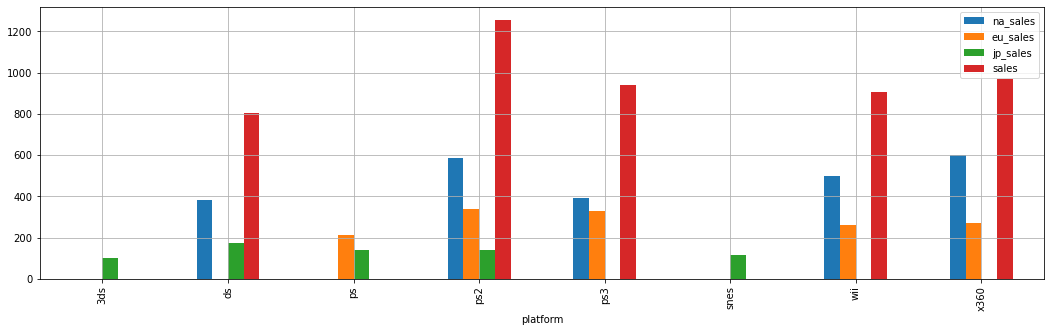

In [45]:
dataset_top = top_platform_region('na_sales')
dataset_top = dataset_top.merge(top_platform_region('eu_sales'), how = 'outer', left_index = True, right_index = True)
dataset_top = dataset_top.merge(top_platform_region('jp_sales'), how = 'outer', left_index = True, right_index = True)
dataset_top = dataset_top.merge(top_platform_region('sales'), how = 'outer', left_index = True, right_index = True)
dataset_top.plot(kind = 'bar', figsize = (18,5), grid = True)

Как видим из диаграммы PS2 популярна и в мире. <br>
Северная Америка любит PS2 и Xbox360 практически одинаково и очень хорошо покупают игры на обеих платформах. <br>
Европа склонна больше к платформам PS 1,2,3. <br>

### Самые популярные жанры (топ-5). Поясните разницу. 

In [46]:
top_platform_region('sales', group_column = 'genre', percent = True, main_col = 'sales')

,sales,percent
genre,,
action,1744.170044,19.6
sports,1331.270020,14.9
shooter,1052.449951,11.8
role-playing,934.559998,10.5
platform,827.770020,9.3


Самый популярный жанр в мире - action, он составляет почти 20% всех продаж в мире. 

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<AxesSubplot:xlabel='rating'>

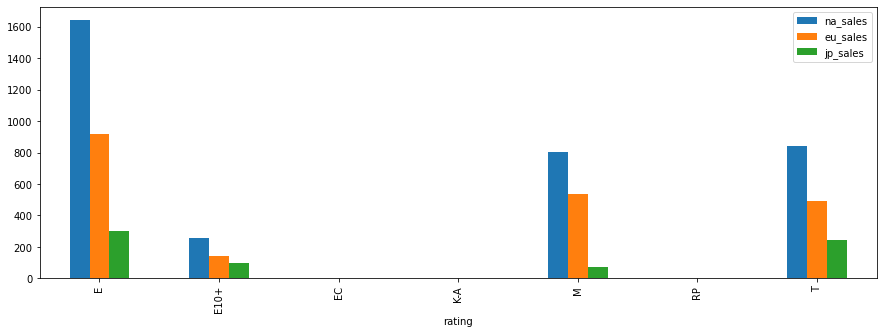

In [47]:
dataset.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().plot(kind = 'bar', figsize = (15,5))

In [48]:
round(dataset.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum() / dataset['sales'].sum() * 100, 1)

,na_sales,eu_sales,jp_sales
rating,,,
E,18.5,10.3,3.4
E10+,2.9,1.6,1.1
EC,0.0,0.0,0.0
K-A,0.0,0.0,0.0
M,9.0,6.0,0.8
RP,0.0,0.0,0.0
T,9.5,5.5,2.8


Наблюдаем следующее: 
- "E" (для всех ) - очень хорошие продажи в Северной Америке 18.5 % от всех продаж, что мы имеем!, 
- А также Американцы, не прочь поиграть и в M (взрослым) и в T (подросткам) составляет ~9% от всех продаж.
- Европейцам по душе "E" (для всех ) и тратят они 8% от всех продаж. 

### Вывод

Выделяем самые интересные моменты:
- Cамая популярная платформа в Европе - PS2, жанр - action, пик продаж с 2007 по 2011
- Cамая популярная платформа в Северной Америке - Xbox 360,  жанр - action, пик продаж с 2006 по 2010
- Cамая популярная платформа в Японии - DS, жанр - role-playing, пик продаж с 2006 по 2010
- PS2 пока является самой прибыльной платформой, но она уже не актуальна. 
- Самый популярный жанр в мире - action, он составляет почти 20% всех продаж в мире. 
- По ESRB "E" (для всех ) - очень хорошие продажи в Северной Америке 18.5 % от всех продаж.

## Проверьте гипотезы 

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Посмотрим данные перед анализом:

<AxesSubplot:>

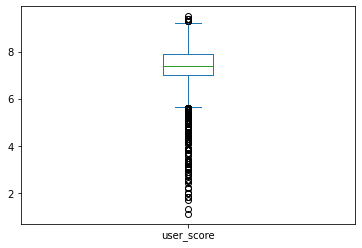

In [49]:
dataset_user = dataset.dropna(subset = ['user_score'])
dataset_user = dataset_user.astype({'user_score' : 'float32'})
dataset_user['user_score'].plot(kind = 'box')

Очень много выбросов справа, очистим их:

In [50]:
per = round(len(dataset_user.loc[dataset_user['user_score'] <= 4.1]) / len(dataset_user) * 100, 1)
print(f'Выбросов: {per} %')

Выбросов: 0.6 %


In [51]:
dataset_user = dataset_user.loc[dataset_user['user_score'] > 4.1]

Сформулируем гипотезы: <br>
H0 - Средние пользовательские оценки платформы Xbox One и PC равны <br>
H1 - Средние пользовательские оценки платформы Xbox One и PC не равны <br>
Уровень значимости alpha = 0.05 <br>
Для расчёта статистики разности и p-value будем использовать функцию st.ttest_ind по критерию Стьюдента

In [52]:
results = st.ttest_ind(dataset_user.loc[dataset_user['platform'] == 'xone', 'user_score'], 
                       dataset_user.loc[dataset_user['platform'] == 'pc', 'user_score'], 
                       equal_var=False)
print('p-value:', results.pvalue)

p-value: 3.5120350705410774e-21


Pvalue намного меньше нуля, что значит мы должны отвергнуть нулевую гипотезу H0 в пользу альтернативной H1, что значит - средние пользовательские оценки платформы Xbox One и PC не равны. 

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен- игры) и Sports (англ. «спортивные соревнования») разные

Для начала сформулируем гипотезы: <br>
H0 - Средние пользовательские рейтинги жанров Action и Sports равны. <br>
H1 - Средние пользовательские рейтинги жанров Action и Sports не равны, то есть разные.  <br>
Уровень значимости alpha = 0.05 <br>
Для расчёта статистики разности и p-value будем использовать функцию st.ttest_ind по критерию Стьюдента

In [53]:
results = st.ttest_ind(dataset_user[dataset_user['genre'] == 'action']['user_score'], 
                       dataset_user[dataset_user['genre'] == 'sports']['user_score'], 
                       equal_var=False)
print('p-value:', results.pvalue)

p-value: 0.48581037404948


Pvalue больше значения alpha = 0.05, что значит мы должны принять нулевую гипотезу H0 и отвергнуть альтернативную H1. То есть предположение о том, что средние пользовательские оценки жанров action и sports разные требуется опровергнуть. 

### Вывод

- Очистили выбросы по столбцу пользовательской оценки
- Отвергнули предположение о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Отвергнули предположение о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен- игры) и Sports (англ. «спортивные соревнования») разные

# Вывод 

#### И так соберем всю картину воедино! : 

__Общее:__ <br>
- Более от 40 до 51 % пропущенных значений в рейтинге, оценки критиков, пользовательской оценке, а также мелкие пропуски в дате релиза и жанрах. <br>
__По исследовальскому анализу:__ <br>
- Актуальный период с 2001 по 2016
- Живучесть платформы в среднем 11 лет с погрешностью 1 год
- Самая прибыльная платформа пока считается PS4
- По глобальным продажам, очень много выбросов. 
- Продажи невзаимосвязаны с оценкой критиков и пользовательской оценкой. 
- Самый прибыльный жанр - platform <br>
__По статическому анализу:__ <br>
- Cамая популярная платформа в Европе - PS2, жанр - action, пик продаж с 2007 по 2011
- Cамая популярная платформа в Северной Америке - Xbox 360,  жанр - action, пик продаж с 2006 по 2010
- Cамая популярная платформа в Японии - DS, жанр - role-playing, пик продаж с 2006 по 2010
- PS2 пока является самой прибыльной платформой, но она уже не актуальна. 
- Самый популярный жанр в мире - action, он составляет почти 20% всех продаж в мире. 
- По ESRB "E" (для всех ) - очень хорошие продажи в Северной Америке 18.5 % от всех продаж.<br>
__По гипотезам:__ <br>
- Отвергнули предположение о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Отвергнули предположение о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен- игры) и Sports (англ. «спортивные соревнования») разные
    
__Общий прогноз:__ <br>
- В 2017 году, стоит сделать упор на PS4 с жанром platform или action с рейтингом по ESRB "E" (для всех ), все эти показатели имеют топ проданных копий по своей метрике.
- Если игра будет выпускаться на несколько платформ, следует аналогично выпустить на Xone, она не менее прибыльна. 